In [1]:
import scipy.stats as stats
import plotly.graph_objects as go
import numpy as np

# **Information Theory, Inference, and Learning Algorithms - Davic J.C. MacKay**



## **1 - Introduction to Information Theory**

### *The binomial distribution*

$$X\sim\text{Binomial}(n\in\mathbb{N}_0,p\in[0,1])$$

$$f_X(x)=\begin{pmatrix}n\\x\end{pmatrix}p^xq^{n-x},\quad \text{supp}(f_X)=\{0,1,\ldots,n\}$$

$$\mathbb{E}(X)=np,\quad\text{Var}(X)=np(1-p)$$

### *Approximating $x!$ and $\begin{pmatrix}N\\r\end{pmatrix}$*

Let 

$$X\sim\text{Poisson}(\lambda\in\mathbb{R}_{\text{nonneg}})$$

$$f_X(x)=e^{-\lambda}\frac{\lambda^x}{x!}$$

For large $\lambda$, this distribution is well approximated--at least in the vicinity of $r\simeq\lambda$--by a Gaussian distribution with mean $\lambda$ and variance $\lambda$.

$$e^{-\lambda}\frac{\lambda^x}{x!}\simeq\frac{1}{\sqrt{2\pi\lambda}}e^{-\frac{(x-\lambda)^2}{2\lambda}}$$

Let $x=\lambda$
$$\begin{align*}
e^{-\lambda}\frac{\lambda^x}{x!}\simeq&\frac{1}{\sqrt{2\pi\lambda}}\\
\implies\lambda!\simeq&\lambda^{\lambda}e^{-\lambda}\sqrt{2\pi\lambda}
\end{align*}$$

In [2]:
x = np.arange(0, 100)

fig = go.Figure()

for l in [10, 30, 60, 90]:
    X = stats.poisson(l)
    N = stats.norm(l, np.sqrt(l))

    fig.add_trace(
        go.Scatter(
            x=x,
            y=X.pmf(x),
            name='$f_X$',
            legendgroup=str(l)
        )
    )

    fig.add_trace(
        go.Scatter(
            x=x,
            y=N.pdf(x),
            name='$N_X$',
            legendgroup=str(l)
        )
    )

fig.show()

# More here not finished

### **Error-correcting codes  for the binary symmetric channel**

#### *Repetition codes*

A straightforward way to add useful redundancy to a transmission is by repeating every bit of the message a prearranged number of times. Suppose we transmit the source message

$$\mathbf{s}=\begin{matrix}0&0&1&0&1&1&0\end{matrix}$$

over a binary symmetric channel with noise level $f=0.1$ using this repition code. We can describe the channel as adding a sparse noice vector $\mathbf{n}$ to the transmitted vector--adding in module 2 arithmetic.

$$\begin{matrix}\mathbf{s}&&0&&&&0&&&&1&&&&0&&&&1&&&&1&&&&0&\\\mathbf{t}&0&0&0&&0&0&0&&1&1&1&&0&0&0&&1&1&1&&1&1&1&&0&0&0\\\mathbf{n}&0&0&0&&0&0&1&&0&0&0&&0&0&0&&1&0&1&&0&0&0&&0&0&0\\\mathbf{r}&0&0&0&&0&0&1&&1&1&1&&0&0&0&&0&1&0&&1&1&1&&0&0&0\end{matrix}$$

The optimal algorithm to decode this vector looks at three bits at a time and takes a majority vote.

The optimal decoding decision (in the sense of having the smallest probability of being wrong) is to find which value of $\mathbf{s}$ is most probable, given $\mathbf{r}$. Consider the decoding of a single bit $s$, which was encoded as $\mathbf{t}(s)$ and gave rise to three receved bits $\mathbf{r}=r_1r_2r_3$. By Bayes' theorem, the posterior probability of $s$ is

$$P(s|r_1r_2r_3)=\frac{P(r_1r_2r_3|s)P(s)}{P(r_1r_2r_3)}$$

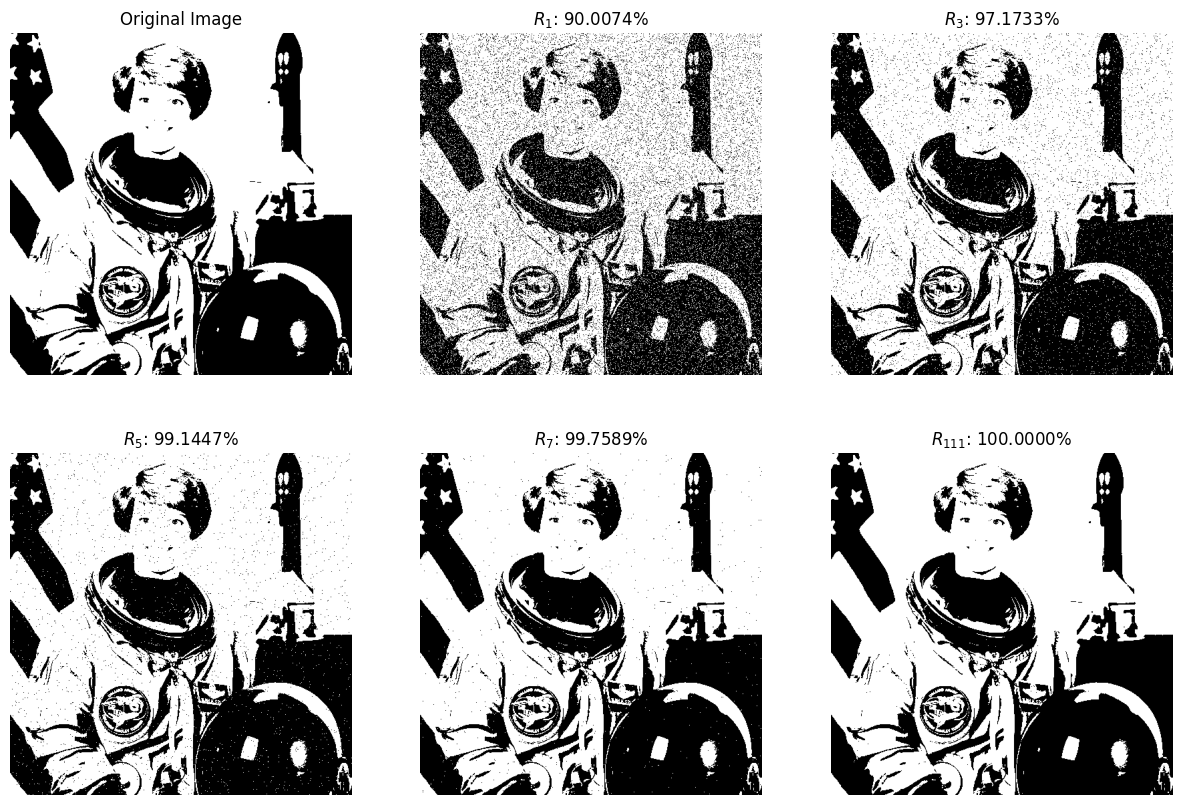

In [3]:
from skimage import data, color
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import numpy as np

f = 0.1

image = data.astronaut()  

gray_image = color.rgb2gray(image)
threshold_value = threshold_otsu(gray_image)
s = gray_image > threshold_value

repitions = [1, 3, 5, 7, 111]


fig, ax = plt.subplots(2, 3, figsize=(15, 10))


ax[0][0].imshow(s, cmap='gray')
ax[0][0].axis('off')
ax[0][0].set_title('Original Image')

for repition, a in zip(repitions, ax.flatten()[1:]):
    t = np.stack([s] * repition, axis=-1)
    n = np.random.binomial(n=1, p=1 - f, size=t.shape)
    r = np.round(np.mean(np.where(n == False, 1 - t, t), axis=-1)).astype(int)
    a.imshow(r, cmap='gray')
    a.axis('off')
    a.set_title(f'$R_{{{repition}}}$: {((s == r).sum() / np.prod(s.shape)) * 100:.4f}%')

**Exercise 1.2:** Show that the error probability is reduced by the use of $R_3$ by computing the error probability of this code for a binary symmetric channel with noise level $f$.

Given a binary symmetric channel, the error probability of direct transmission is given by $f$, the noise level. With $R_3$, each bit can be represented by $X\sim\text{Binomial}(n=3,p=1-f)$. The probability of error is then given by 

$$P(X=1\cup X=0)=\frac{3!}{1!(3-1)!}(1-f)^1f^{3-1}+\frac{3!}{0!(3-0)!}(1-f)^0f^{3-0}=3f^2-2f^3$$

Compared to the original probability 

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import defaultdict
# from ..chris_functions import latex_helper


# latex_helper()

n_trials = 5000
r_n_range = list(range(1, 8, 2)) + [111]
f_range = [0.1, 0.25, 0.4, 0.5, 0.6, 0.75, 0.9]
fs_and_errors = defaultdict(list)

fig = make_subplots(rows=3, cols=3, subplot_titles=[f'$f={f_range[0]}$', f'$f={f_range[1]}$', f'$f={f_range[2]}$', '', f'$f={f_range[3]}$', '', f'$f={f_range[4]}$', f'$f={f_range[5]}$', f'$f={f_range[6]}$'])


def plot_stuff(f, row, col):
    fig.add_hline(f, row=row, col=col, name=f'$f={f}$', showlegend=True)
    for r_n in r_n_range:
        trials = []
        for _ in range(n_trials):
            t = np.array([1] * r_n)
            n = np.random.binomial(n=1, p=1 - f, size=t.shape)
            r = np.round(np.mean(np.where(n == False, 1 - t, t), axis=-1)).astype(int)
            trials.append(r)
        fig.add_trace(
            go.Scatter(
                x=np.arange(1, n_trials + 1),
                y=np.cumsum(trials) / np.arange(1, n_trials + 1),
                name=f'$f={f}, R_N={r_n}$',
                legendgroup=f'$R_N={r_n}$'
            ),
            row=row,
            col=col
        )

plot_stuff(f_range[0], 1, 1)
plot_stuff(f_range[1], 1, 2)
plot_stuff(f_range[2], 1, 3)

plot_stuff(f_range[3], 2, 2)

plot_stuff(f_range[4], 3, 1)
plot_stuff(f_range[5], 3, 2)
plot_stuff(f_range[6], 3, 3)



fig

**Exercise 1.3:** 

 - (a) Show that the probability of error of $R_N$, the repetition code with $N$ repetititions is 

$$p_b=\sum_{n=(N+1)/2}\begin{pmatrix}N\\n\end{pmatrix}f^n(1-f)^{N-n}$$

for odd $N$

<div>

$N$ is the number of repetitions and $f$ is the noise. Given a binary symmetric channel where $Y$ is the recieved bit and $X$ is transmitted bit, 
$$P(Y=0|X=0)=P(Y=1|X=1)=P(Y=s_i|X=s_i)=1-f$$
and 

$$P(Y=1|X=0)=P(Y=0|X=1)=P(Y\not=s_i|X=s_i)=f$$

Let 

$$T\sim\text{Bernoulli}(p=1-f)$$

represent the succesful transmission of a bit where $1$ is success and $0$ is failure. We transmit each bit from our source code $N$ times and keep the most frequent bit. That is saying, a succesful transmission of a bit from $\mathbf{s}$ is determined by 

$$X\sim\text{Binomial}(n=N,p=1-f)$$

the number of successes in $N$ independent (assumed) bernoulli trials with probabiliy of success $p=1-f$, so the probability of succesfully transmitting a bit from $\mathbf{s}$ is given by, where $\frac{N+1}{2}$ is the required number of successes to win the majority vote, $P(X\ge\frac{N+1}{2})$. The error probabilty is the probability of losing the majority vote, 

$$P(X<\frac{N+1}{2})=\sum_{i=1}^{\frac{N+1}{2}-1}\begin{pmatrix}N\\i\end{pmatrix}(1-f)^if^{N-i}$$

If $p=f$ is reversed, then, $X\sim\text{Binomial}(n=N,p=f)$: $N$ independent bernoulli trials with probability of success $p=f$, and the error probability is

$$P(X\ge\frac{N+1}{2})=1-\sum_{i=1}^{\frac{N+1}{2}-1}\begin{pmatrix}N\\i\end{pmatrix}f^{i}(1-f)^{N-i}=\sum_{i=\frac{N+1}{2}}^{N}\begin{pmatrix}N\\i\end{pmatrix}f^{i}(1-f)^{N-i}$$

identical to the expression in the textbook.

</div>


In [ ]:
import plotly.graph_objects as go
import scipy.stats as stats
import numpy as np
from chris_functions import latex_helper

latex_helper()

N = 100
f = 0.5

X = stats.binom(N, f)

fig = go.Figure()


x = np.arange(0, N + 1)
P_x = X.pmf(x)


fig.add_trace(
    go.Scatter(
        x=x,
        y=P_x,
        mode='lines',
        line_shape='hvh',
        name=f"$p(x)=\\begin{{pmatrix}}{N}\\\\x\\end{{pmatrix}}f^x(1-f)^{{N-x}}$"
    )
)

mask = x <= ((N + 1) / 2 - 1)
fig.add_trace(
    go.Scatter(
        x=x[mask],
        y=P_x[mask],
        line_shape='hvh',
        fill='tozeroy',
        mode='lines'
    )
)


mask = x >= ((N + 1) / 2)
fig.add_trace(
    go.Scatter(
        x=x[mask],
        y=P_x[mask],
        line_shape='hvh',
        fill='tozeroy',
        mode='lines'
    )
)

fig.add_vline((N + 1) / 2)


# fig.add_trace(
#     go.Scatter(
#['none', 'tozeroy', 'tozerox', 'tonexty', 'tonextx',
#            'toself', 'tonext']
#     )
# )['linear', 'spline', 'hv', 'vh', 'hvh', 'vhv']


# x = 


 - (b) Assuming $f=0.1$, which of the terms in this sum is the biggest? How much bigger is the second-biggest term?

First lets see what the curve of the term $\begin{pmatrix}N\\x\end{pmatrix}f^x(1-f)^{N-x}$ looks like for various $N$.


In [ ]:
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats

fig = go.Figure()


for i in range(100, 3_000, 100):
    X = stats.binom(i, 0.3)
    x = np.arange(0, i)
    P_x = X.pmf(x)
    fig.add_trace(
        go.Scatter(
            x=x,
            y=P_x
        )
    )


fig

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        
    )
)


 - (c) 